In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd() / "_scripts"))

In [50]:
import seaborn as sns
import seaborn.objects as so
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

from helpers.variable_interfaces import all_variables as vars

# from setup.data_wrangle import *
# from setup.materials_setup import *
# from analysis.dataframes import *
# from analysis.volumes import *

from experiments.retrieve import retrieve_comparison_groups, retrieve_control_cases
from experiments.name_splits import *
# sns.set_style("darkgrid")

from analysis2.all_cases_v_time import create_space_and_site_dfs
from setup.data_wrangle2 import create_wide_dataframe_for_many_qois_and_cases


In [55]:
cases = retrieve_comparison_groups("doors")
cases

# get_experiment_folders()

[CaseData(case_name='bol_5_CLOSED', idf=<geomeppy.idf.IDF object at 0x1694ed9c0>, sql=Energy SQLiteResult: /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/241119_doors/bol_5_CLOSED/results/eplusout.sql, path_to_input=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/outputs2/case_bol_5'), path_to_output=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/241119_doors/bol_5_CLOSED')),
 CaseData(case_name='amb_b1_DYNAMIC', idf=<geomeppy.idf.IDF object at 0x1697de3b0>, sql=Energy SQLiteResult: /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/241119_doors/amb_b1_DYNAMIC/results/eplusout.sql, path_to_input=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/outputs2/case_amb_b1'), path_to_output=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/241119_doors/amb_b1_DYNAMIC')),
 CaseData(case_name='red_b1_DYNAMIC', idf=<geomeppy.idf.IDF object at 0x169ae5ae0>, sql=Energy SQLiteResult: /Users

In [56]:
df_temp = create_wide_dataframe_for_many_qois_and_cases(cases, [vars.zone.temp["zone_mean_air_temp"]])

df, df_site = create_space_and_site_dfs(cases=cases, space_qois=[vars.afn.zone["vent_vol"], vars.afn.zone["mix_vol"]], site_qois=[vars.site.wind["speed"]])

In [57]:
df_vol = df.join(df_temp, on=["case_names", "space_names", "datetimes"]).with_columns(combined_vent =pl.col("AFN Zone Ventilation Volume [m3]") + pl.col("AFN Zone Mixing Volume [m3]"))
df_vol.head()

case_names,space_names,datetimes,AFN Zone Ventilation Volume [m3],AFN Zone Mixing Volume [m3],time,Zone Mean Air Temperature [C],combined_vent
str,str,datetime[μs],f64,f64,str,f64,f64
"""bol_5_CLOSED""","""BLOCK 00 STOREY 0""",2017-07-01 00:00:00,240.133294,0.0,"""00:00""",19.624067,240.133294
"""bol_5_CLOSED""","""BLOCK 00 STOREY 0""",2017-07-01 00:15:00,281.920251,0.0,"""00:15""",18.62186,281.920251
"""bol_5_CLOSED""","""BLOCK 00 STOREY 0""",2017-07-01 00:30:00,308.423544,0.0,"""00:30""",17.635697,308.423544
"""bol_5_CLOSED""","""BLOCK 00 STOREY 0""",2017-07-01 00:45:00,324.762766,0.0,"""00:45""",16.662282,324.762766
"""bol_5_CLOSED""","""BLOCK 00 STOREY 0""",2017-07-01 01:00:00,309.539315,0.0,"""01:00""",16.507866,309.539315


In [58]:
df_agg = df_vol.group_by("case_names").agg([pl.mean("AFN Zone Ventilation Volume [m3]"),
pl.mean("AFN Zone Mixing Volume [m3]"),
pl.mean("combined_vent"), 
pl.mean("Zone Mean Air Temperature [C]")
])
df_agg

case_names,AFN Zone Ventilation Volume [m3],AFN Zone Mixing Volume [m3],combined_vent,Zone Mean Air Temperature [C]
str,f64,f64,f64,f64
"""bol_5_CLOSED""",317.663785,92.129051,409.792836,23.154855
"""bol_5_DYNAMIC""",326.89749,144.66714,471.564629,23.126356
"""bol_5_Medium""",340.079384,250.772877,590.852261,23.040847
"""amb_b1_Medium""",91.36269,353.926941,445.28963,23.111333
"""red_b1_Medium""",299.684163,405.075236,704.759398,22.126302
"""red_b1_CLOSED""",232.640805,146.860422,379.501227,22.327406
"""red_b1_DYNAMIC""",262.983758,253.302264,516.286022,22.288867
"""amb_b1_CLOSED""",70.374518,208.903753,279.278271,23.553939
"""amb_b1_DYNAMIC""",85.99218,291.524465,377.516645,23.418397


In [62]:
df_agg = split_by_doors(split_by_case_type(df_agg))
df_agg

case_names,AFN Zone Ventilation Volume [m3],AFN Zone Mixing Volume [m3],combined_vent,Zone Mean Air Temperature [C],case_type,exp_type
str,f64,f64,f64,f64,str,str
"""bol_5_CLOSED""",317.663785,92.129051,409.792836,23.154855,"""bol""","""CLOSED"""
"""bol_5_DYNAMIC""",326.89749,144.66714,471.564629,23.126356,"""bol""","""DYNAMIC"""
"""bol_5_Medium""",340.079384,250.772877,590.852261,23.040847,"""bol""","""OPEN"""
"""amb_b1_Medium""",91.36269,353.926941,445.28963,23.111333,"""amb""","""OPEN"""
"""red_b1_Medium""",299.684163,405.075236,704.759398,22.126302,"""red""","""OPEN"""
"""red_b1_CLOSED""",232.640805,146.860422,379.501227,22.327406,"""red""","""CLOSED"""
"""red_b1_DYNAMIC""",262.983758,253.302264,516.286022,22.288867,"""red""","""DYNAMIC"""
"""amb_b1_CLOSED""",70.374518,208.903753,279.278271,23.553939,"""amb""","""CLOSED"""
"""amb_b1_DYNAMIC""",85.99218,291.524465,377.516645,23.418397,"""amb""","""DYNAMIC"""


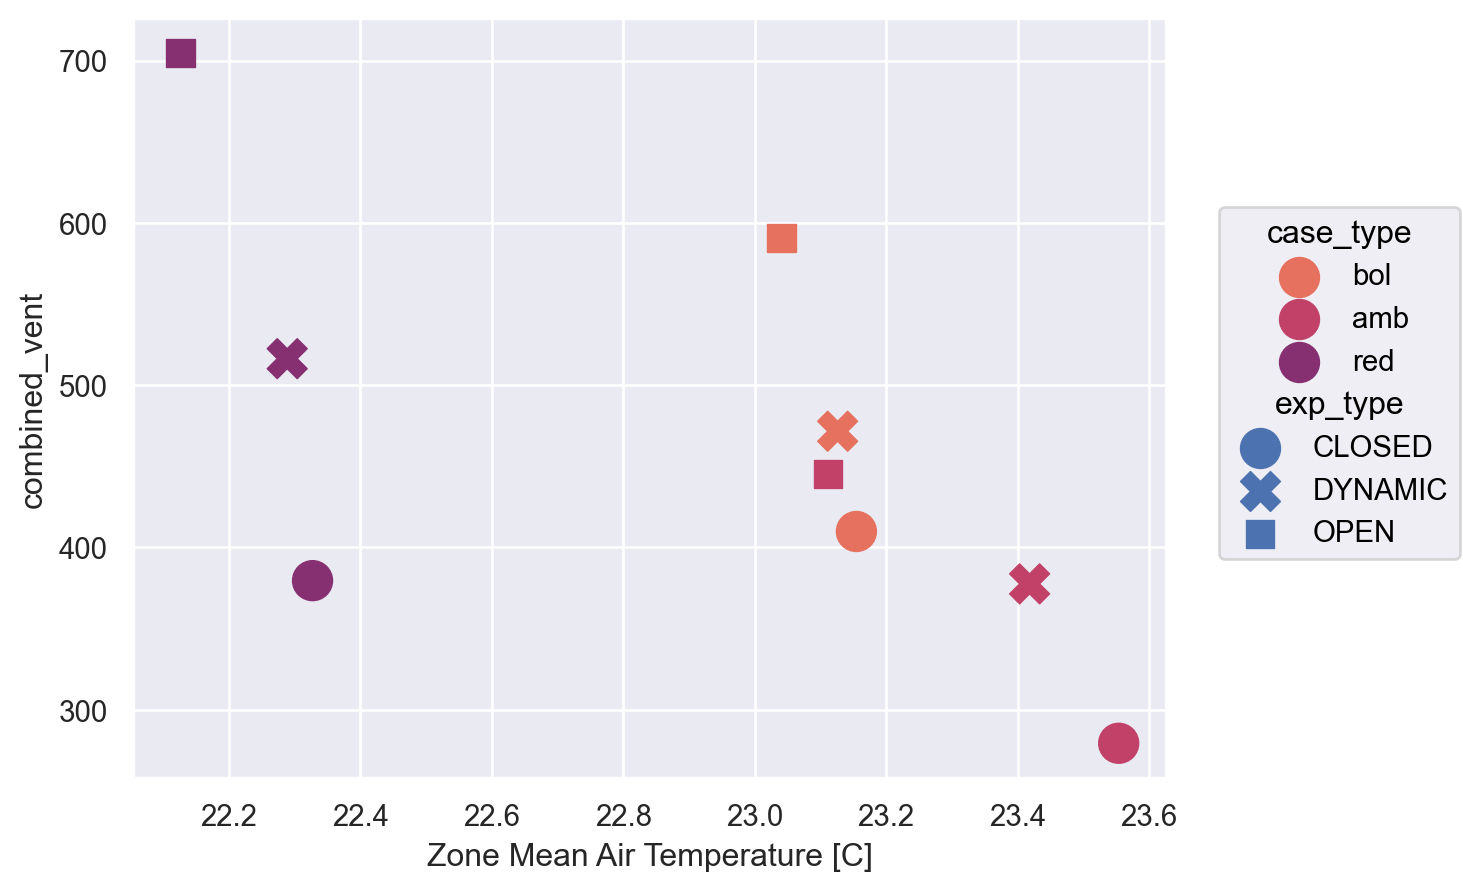

In [63]:
(so.Plot(df_agg, x="Zone Mean Air Temperature [C]", y="combined_vent", color="case_type", marker="exp_type" ).add(so.Dot(pointsize=15)).scale(color="flare").plot())
  

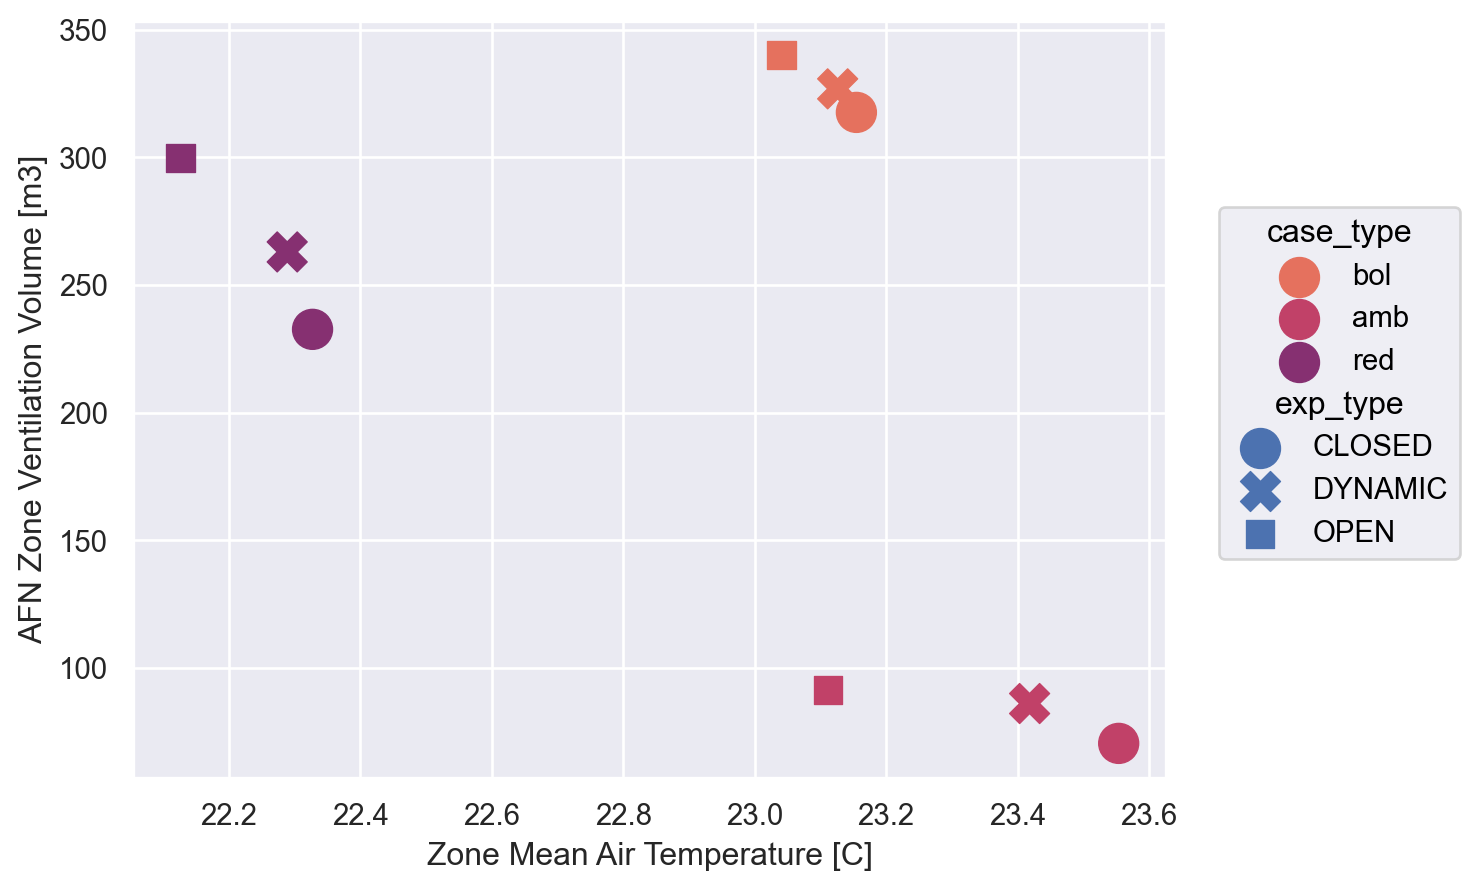

In [64]:
(so.Plot(df_agg, x="Zone Mean Air Temperature [C]", y="AFN Zone Ventilation Volume [m3]", color="case_type", marker="exp_type" ).add(so.Dot(pointsize=15)).scale(color="flare").plot())